In [ ]:
#!pip install mlxtend

In [5]:
import numpy as np
import pandas as pd

# 장바구니 분석

In [9]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [84]:
dataset=[['사과','치즈','생수'],
               ['생수','호두','치즈','고등어'],
               ['수박','사과','생수'],
               ['생수','호두','치즈','옥수수']]

In [113]:
##############################
##   dataset의 고유값 추출
##  파이썬의 extend로도 리스트 연결가능함.
################################
import numpy as np
tmp = []
for x in dataset:
    for j in x:
        tmp.append(j)
np.unique(tmp)

array(['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두'], dtype='<U3')

In [114]:
## 직접 판다스로 만들어보기
items = np.unique(tmp)
df = pd.DataFrame(index=range(0,len(dataset)), columns=list(items))

for i, k in enumerate(dataset):
    tmp = []
    for y in items:
        tmp.append(y in k)
    df.loc[i] = tmp
df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [98]:
# 강사님 방법
items = np.unique(tmp)
result=[]
for data in dataset:
    list_ = ['True' if x in data else 'False' for x in items]
    result.append(list_)
result
pd.DataFrame(result, columns=items)

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [12]:
te = TransactionEncoder()
te.fit(dataset)
te.columns_

['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두']

In [13]:

te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[False,  True,  True, False, False,  True, False],
       [ True, False,  True, False, False,  True,  True],
       [False,  True,  True,  True, False, False, False],
       [False, False,  True, False,  True,  True,  True]])

In [14]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [115]:
# 옵션 설정하지 않으면 지지도가 기본 0.5 이상값이 나옴 (min_support)
frequent_itemsets = apriori(df,use_colnames=True)
print(frequent_itemsets)

  support      itemsets
0     0.5          (사과)
1     1.0          (생수)
2    0.75          (치즈)
3     0.5          (호두)
4     0.5      (생수, 사과)
5    0.75      (생수, 치즈)
6     0.5      (생수, 호두)
7     0.5      (치즈, 호두)
8     0.5  (생수, 치즈, 호두)


In [120]:
# 아래 작업은 모든 경우의 수를다 보여주는 작업
apriori(df,min_support=0.1,use_colnames=True)

,support,itemsets
0,0.25,(고등어)
1,0.5,(사과)
2,1.0,(생수)
3,0.25,(수박)
4,0.25,(옥수수)
5,0.75,(치즈)
6,0.5,(호두)
7,0.25,"(생수, 고등어)"
8,0.25,"(치즈, 고등어)"
9,0.25,"(고등어, 호두)"


In [121]:
# 아래 작업은 모든 경우의 수를다 보여주는 작업
frequent_itemsets = apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets['itemsets']

0                 (고등어)
1                  (사과)
2                  (생수)
3                  (수박)
4                 (옥수수)
5                  (치즈)
6                  (호두)
7             (생수, 고등어)
8             (치즈, 고등어)
9             (고등어, 호두)
10             (생수, 사과)
11             (수박, 사과)
12             (치즈, 사과)
13             (생수, 수박)
14            (생수, 옥수수)
15             (생수, 치즈)
16             (생수, 호두)
17            (치즈, 옥수수)
18            (호두, 옥수수)
19             (치즈, 호두)
20        (치즈, 생수, 고등어)
21        (생수, 고등어, 호두)
22        (치즈, 고등어, 호두)
23         (생수, 수박, 사과)
24         (치즈, 생수, 사과)
25        (생수, 치즈, 옥수수)
26        (생수, 호두, 옥수수)
27         (생수, 치즈, 호두)
28        (호두, 치즈, 옥수수)
29    (치즈, 생수, 고등어, 호두)
30    (생수, 치즈, 호두, 옥수수)
Name: itemsets, dtype: object

In [122]:
## 특정갯수 이상의 item만 추출
### 길이 열을 추가
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) 
# 길이가 2개 이상인 것 추출
frequent_itemsets[frequent_itemsets['length'] >=2] 

,support,itemsets,length
7,0.25,"(생수, 고등어)",2
8,0.25,"(치즈, 고등어)",2
9,0.25,"(고등어, 호두)",2
10,0.5,"(생수, 사과)",2
11,0.25,"(수박, 사과)",2
12,0.25,"(치즈, 사과)",2
13,0.25,"(생수, 수박)",2
14,0.25,"(생수, 옥수수)",2
15,0.75,"(생수, 치즈)",2
16,0.5,"(생수, 호두)",2


In [123]:
# # 특정 아이템(치즈)이 포함된 것만 추출
frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: '치즈' in x)] 

,support,itemsets,length
5,0.75,(치즈),1
8,0.25,"(치즈, 고등어)",2
12,0.25,"(치즈, 사과)",2
15,0.75,"(생수, 치즈)",2
17,0.25,"(치즈, 옥수수)",2
19,0.5,"(치즈, 호두)",2
20,0.25,"(치즈, 생수, 고등어)",3
22,0.25,"(치즈, 고등어, 호두)",3
24,0.25,"(치즈, 생수, 사과)",3
25,0.25,"(생수, 치즈, 옥수수)",3


In [126]:
from mlxtend.frequent_patterns import apriori,association_rules

# metric 에는 지지도(support), 신뢰도(confidence), 향상도(lift) 사용가능
# 값의 최소옵션은 min_threshold에 기입함.

# confidence(신뢰도)는 A가 B에 종속됨의 정도, 숫자가 높을수록 종속성이 강함
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)
rules
# association_rules(frequent_itemsets, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
1,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
4,(고등어),(호두),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
...,...,...,...,...,...,...,...,...,...
103,"(옥수수, 호두)","(생수, 치즈)",0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
104,(생수),"(치즈, 옥수수, 호두)",1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
105,(치즈),"(생수, 옥수수, 호두)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
106,(호두),"(생수, 치즈, 옥수수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500


In [130]:
# lift(향상도) 는 1 이상이어야 연관성이 있음. 
# B값이 A값에 연관도가 높을 수록 향상도 값이 커짐
# 아래에서는 A가(antecdents) B가(consequents)
association_rules(frequent_itemsets, metric="lift", min_threshold=2) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(고등어),(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
1,(호두),(고등어),0.50,0.25,0.25,0.5,2.0,0.125,1.5
2,(수박),(사과),0.25,0.50,0.25,1.0,2.0,0.125,inf
3,(사과),(수박),0.50,0.25,0.25,0.5,2.0,0.125,1.5
4,(호두),(옥수수),0.50,0.25,0.25,0.5,2.0,0.125,1.5
5,(옥수수),(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
6,"(생수, 고등어)",(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
7,"(생수, 호두)",(고등어),0.50,0.25,0.25,0.5,2.0,0.125,1.5
8,(고등어),"(생수, 호두)",0.25,0.50,0.25,1.0,2.0,0.125,inf
9,(호두),"(생수, 고등어)",0.50,0.25,0.25,0.5,2.0,0.125,1.5


In [133]:
# lift값이 가장 큰 값
rules[rules.antecedents == {'호두'}].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(호두),(고등어),0.5,0.25,0.25,0.5,2.000000,0.125,1.5
22,(호두),(옥수수),0.5,0.25,0.25,0.5,2.000000,0.125,1.5
37,(호두),"(생수, 고등어)",0.5,0.25,0.25,0.5,2.000000,0.125,1.5
43,(호두),"(치즈, 고등어)",0.5,0.25,0.25,0.5,2.000000,0.125,1.5
66,(호두),"(생수, 옥수수)",0.5,0.25,0.25,0.5,2.000000,0.125,1.5
77,(호두),"(치즈, 옥수수)",0.5,0.25,0.25,0.5,2.000000,0.125,1.5
93,(호두),"(생수, 치즈, 고등어)",0.5,0.25,0.25,0.5,2.000000,0.125,1.5
106,(호두),"(생수, 치즈, 옥수수)",0.5,0.25,0.25,0.5,2.000000,0.125,1.5
25,(호두),(치즈),0.5,0.75,0.50,1.0,1.333333,0.125,inf
73,(호두),"(생수, 치즈)",0.5,0.75,0.50,1.0,1.333333,0.125,inf


In [132]:
# 특정단어가 있는 자료 찾기,위에서 한 내용임
rules[rules.antecedents.apply(lambda x: '생수' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
6,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.0000,1.000
12,(생수),(수박),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
14,(생수),(옥수수),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
16,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.0000,1.000
18,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.0000,1.000
26,"(생수, 치즈)",(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
28,"(생수, 고등어)",(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
30,(생수),"(치즈, 고등어)",1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
32,"(생수, 고등어)",(호두),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf


In [134]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
1,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
4,(고등어),(호두),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
...,...,...,...,...,...,...,...,...,...
103,"(옥수수, 호두)","(생수, 치즈)",0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
104,(생수),"(치즈, 옥수수, 호두)",1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
105,(치즈),"(생수, 옥수수, 호두)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
106,(호두),"(생수, 치즈, 옥수수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500


In [135]:
!pip install networkx

In [136]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=759143f59d4d49c40c627280a08446c3be4eb4929f5d9546d7496725e733cbd0
  Stored in directory: c:\users\dq\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [137]:
from apyori import apriori
result=(list(apriori(dataset, min_support=0.01)))
df=pd.DataFrame(result)
df[:5]

,items,support,ordered_statistics
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]"
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]"
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]"
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]"
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]"


In [141]:
# 글자길이
df['length']=df['items'].apply(lambda x: len(x))
df[:5]

,items,support,ordered_statistics,length
15,"(생수, 치즈)",0.75,"[((), (생수, 치즈), 0.75, 1.0), ((생수), (치즈), 0.75,...",2
10,"(생수, 사과)",0.50,"[((), (생수, 사과), 0.5, 1.0), ((사과), (생수), 1.0, 1...",2
16,"(생수, 호두)",0.50,"[((), (생수, 호두), 0.5, 1.0), ((생수), (호두), 0.5, 1...",2
19,"(치즈, 호두)",0.50,"[((), (치즈, 호두), 0.5, 1.0), ((치즈), (호두), 0.6666...",2
7,"(생수, 고등어)",0.25,"[((), (생수, 고등어), 0.25, 1.0), ((고등어), (생수), 1.0...",2


In [139]:
# 필수는 아닌것 같음
df=df[(df['length']==2) & (df['support']>=0.01)].sort_values(by='support',ascending=False)
df.head(10)

,items,support,ordered_statistics,length
15,"(생수, 치즈)",0.75,"[((), (생수, 치즈), 0.75, 1.0), ((생수), (치즈), 0.75,...",2
10,"(생수, 사과)",0.50,"[((), (생수, 사과), 0.5, 1.0), ((사과), (생수), 1.0, 1...",2
16,"(생수, 호두)",0.50,"[((), (생수, 호두), 0.5, 1.0), ((생수), (호두), 0.5, 1...",2
19,"(치즈, 호두)",0.50,"[((), (치즈, 호두), 0.5, 1.0), ((치즈), (호두), 0.6666...",2
7,"(생수, 고등어)",0.25,"[((), (생수, 고등어), 0.25, 1.0), ((고등어), (생수), 1.0...",2
8,"(치즈, 고등어)",0.25,"[((), (치즈, 고등어), 0.25, 1.0), ((고등어), (치즈), 1.0...",2
9,"(고등어, 호두)",0.25,"[((), (고등어, 호두), 0.25, 1.0), ((고등어), (호두), 1.0...",2
11,"(수박, 사과)",0.25,"[((), (수박, 사과), 0.25, 1.0), ((사과), (수박), 0.5, ...",2
12,"(치즈, 사과)",0.25,"[((), (치즈, 사과), 0.25, 1.0), ((사과), (치즈), 0.5, ...",2
13,"(생수, 수박)",0.25,"[((), (생수, 수박), 0.25, 1.0), ((생수), (수박), 0.25,...",2


In [142]:
## 이건 내 자료로 해보고 있음.
r=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)
tmp=pd.DataFrame(r)
display(tmp[:5])

tmp['length']=tmp['antecedents'].apply(lambda x: len(x))
tmp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
1,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
4,(고등어),(호두),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000,1
1,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf,1
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125,1
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf,1
4,(고등어),(호두),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf,1
...,...,...,...,...,...,...,...,...,...,...
103,"(옥수수, 호두)","(생수, 치즈)",0.25,0.75,0.25,1.000000,1.333333,0.0625,inf,2
104,(생수),"(치즈, 옥수수, 호두)",1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000,1
105,(치즈),"(생수, 옥수수, 호두)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125,1
106,(호두),"(생수, 치즈, 옥수수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500,1


In [143]:
!pip install networkx

In [144]:
import networkx as nx
G=nx.Graph()
ar=(df['items']); G.add_edges_from(ar)
ar

15     (생수, 치즈)
10     (생수, 사과)
16     (생수, 호두)
19     (치즈, 호두)
7     (생수, 고등어)
8     (치즈, 고등어)
9     (고등어, 호두)
11     (수박, 사과)
12     (치즈, 사과)
13     (생수, 수박)
14    (생수, 옥수수)
17    (치즈, 옥수수)
18    (호두, 옥수수)
Name: items, dtype: object

In [145]:
G1=nx.Graph()
ar1=tmp['antecedents']; G1.add_edges_from(ar)
ar1

0           (생수)
1          (고등어)
2           (치즈)
3          (고등어)
4          (고등어)
         ...    
103    (옥수수, 호두)
104         (생수)
105         (치즈)
106         (호두)
107        (옥수수)
Name: antecedents, Length: 108, dtype: object

In [146]:
pr=nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))
nsize

array([2000.        , 1450.1405505 ,  506.37981884,  933.20920045,
        429.68501826,    0.        ,  429.68501826])

In [147]:
pos=nx.planar_layout(G1)
pos

{'생수': array([-1.        , -0.38461538]),
 '치즈': array([ 0.79487179, -0.38461538]),
 '사과': array([0.07692308, 0.33333333]),
 '호두': array([ 0.07692308, -0.02564103]),
 '고등어': array([ 0.07692308, -0.20512821]),
 '수박': array([-0.1025641 ,  0.51282051]),
 '옥수수': array([0.07692308, 0.15384615])}

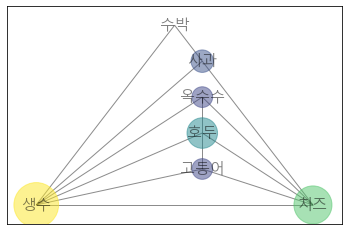

In [151]:
# 한글폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "C:/windows/fonts/malgun.ttf"
plt.figure(figsize=(16,12)); plt.axis('off')
fname = fm.FontProperties(fname=font_path).get_name()

%matplotlib inline
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G, pos=pos, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)